In [80]:
# Question 1, Test of significance

# Import libraries
import scipy.stats as stats

In [81]:
# Step 1: Define the given data for the test
# We assume that the assembly times before and after the training program follow a normal distribution
# This assumption allows us to use a Z-test since we know the population standard deviation

# population mean before training
pop_mean = 35
# population standard deviation
pop_std_dev = 5
# sample size
sample_size = 40
# sample mean after training
sample_mean = 33
# 5% significance level
sig_level = 0.05

In [82]:
# Step 2: Set up the hypotheses
# Null Hypothesis (H0): The average assembly time has not decreased, meaning the training had no effect (H0: μ = 35)
# Alternative Hypothesis (H1): The average assembly time has decreased, meaning the training was effective (H1: μ < 35)

In [83]:
# Step 3: Calculate the test statistic (Z-score)
# For the Z-test, we use the formula: Z = (sample_mean - pop_mean) / (pop_std_dev / sqrt(sample_size))
z_score = (sample_mean - pop_mean) / (pop_std_dev / (sample_size ** 0.5))

In [84]:
# Step 4: Find the critical value for our significance level
# Since this is a one-tailed test, we need the critical value for the lower tail
# We can calculate the Z-value at the 5% significance level using norm.ppf function
critical_value = stats.norm.ppf(sig_level)

In [85]:
# Step 5: Calculate the p-value for the observed Z-score
# We can calculate the CDF using norm.cdf function
p_value = stats.norm.cdf(z_score)

In [86]:
# Step 6: Make a decision based on the p-value and the significance level
# If the p-value is less than the significance level, we reject the null hypothesis
# If the p-value is greater than the significance level, we fail to reject the null hypothesis

# Displaying results
print(f"Z-score: {z_score}")
print(f"Critical value: {critical_value}")
print(f"P-value: {p_value}")

# Conclusion
if p_value < sig_level:
    print("Reject the null hypothesis. The training program has significantly reduced the assembly time.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that the training program reduced the assembly time.")

Z-score: -2.5298221281347035
Critical value: -1.6448536269514729
P-value: 0.005706018193000826
Reject the null hypothesis. The training program has significantly reduced the assembly time.


In [87]:
# Question 2, Test of significance

# Import libraries
import scipy.stats as stats

In [88]:
# Step 1: State the initial assumption of population distribution
# We assume that the study hours before and after study follow a normal distribution
# This assumption allows us to use a t-test since we know the sample standard deviation

# Hypothesized population mean
pop_mean = 25
# Number of students in the sample
sample_size = 15
# Sample mean study time in hours
sample_mean = 27
# Sample standard deviation of study time
sample_std_dev = 4.5
# 5% significance level
sig_level = 0.05

In [89]:
# Step 2: State the hypotheses
# Null Hypothesis (H0): The mean study time for graduate students is 25 hours per week (H0: μ = 25)
# Alternative Hypothesis (H1): The mean study time for graduate students is greater than 25 hours per week (H1: μ > 25)

In [90]:
# Step 3: Calculate the test statistic
# For the t-test, we can use the formula: t = (sample_mean - pop_mean) / (sample_std_dev / sqrt(sample_size))
t_statistic = (sample_mean - pop_mean) / (sample_std_dev / (sample_size ** 0.5))

In [91]:
# Step 4: Find the critical value for our significance level
# Since this is a one-tailed test, we need the critical value for the upper tail
df = sample_size - 1
# We can calculate the Z-value at the 5% significance level using stats.t.ppf function
critical_value = stats.t.ppf(1 - sig_level, df)

In [92]:
# Step 5: Calculate the p-value for the observed Z-score
# We can calculate the SF using stats.t.sf function
p_value = stats.t.sf(t_statistic, df)

In [93]:
# Step 6: Make a decision based on the critical value, p-value and the significance level
# If the t-statistic is less than the critical value or p-value greater than significance level, we fail to reject the null hypothesis
# If the t-statistic is greater than the critical value or p-value less than significance level, we reject the null hypothesis

# Displaying results
print("Test Statistic (t):", t_statistic)
print("Critical Value:", critical_value)
print("P-Value:", p_value)

# Conclusion
if t_statistic > critical_value:
    print("Reject the null hypothesis: There is evidence that graduate students study more than 25 hours per week on average.")
else:
    print("Fail to reject the null hypothesis: There is insufficient evidence that graduate students study more than 25 hours per week on average.")

Test Statistic (t): 1.7213259316477407
Critical Value: 1.7613101357748562
P-Value: 0.05360191367469441
Fail to reject the null hypothesis: There is insufficient evidence that graduate students study more than 25 hours per week on average.


In [94]:
# Regression

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from scipy import stats
from scipy.stats import shapiro

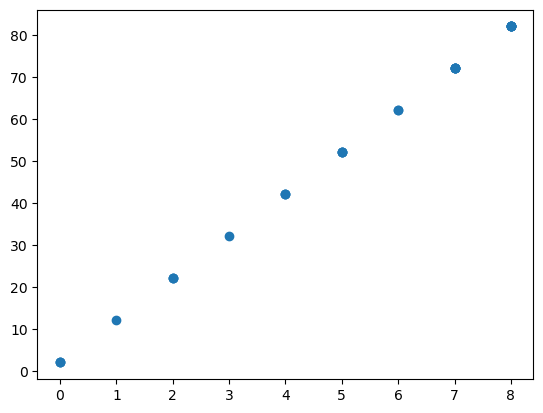

In [95]:
# Define the data
data = {
    "Hours_of_Study": [5, 5, 7, 3, 0, 5, 2, 7, 4, 2, 1, 6, 8, 5, 7, 8, 7, 8, 8, 8, 0, 8, 7, 4, 6, 7, 2, 0, 8, 4],
    "Score": [52.1221, 52.1221, 72.1221, 32.1221, 2.122104, 52.1221, 22.1221, 72.1221, 42.1221, 22.1221, 
              12.1221, 62.1221, 82.1221, 52.1221, 72.1221, 82.1221, 72.1221, 82.1221, 82.1221, 82.1221,
              2.122104, 82.1221, 72.1221, 42.1221, 62.1221, 72.1221, 22.1221, 2.122104, 82.1221, 42.1221]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Defining independent variable (X) and dependent variable (Y)
X = df['Hours_of_Study']
y = df['Score']

# scatter plot for Hours_of_Study and Score
plt.scatter(df['Hours_of_Study'], df['Score'])
plt.show()

In [96]:
# The scatterplot suggests a strong linear relationship between hours of study and exam scores, satisfying linearity.

# Fit a Simple Linear Regression Model
# Define independent variable (X) and dependent variable (y)
X = df[['Hours_of_Study']].values.reshape(-1, 1)  # Reshape for sklearn
y = df['Score'].values

# Initialize and fit the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [97]:
# Intercept and co-efficient of the Linear Regression Model
lin_reg.intercept_, lin_reg.coef_

(2.1221018403990257, array([9.99999972]))

In [98]:
# Predict on the data to get fitted values
y_pred = lin_reg.predict(X)

In [99]:
# Display predicted values
y_pred

array([52.12210042, 52.12210042, 72.12209985, 32.12210099,  2.12210184,
       52.12210042, 22.12210127, 72.12209985, 42.1221007 , 22.12210127,
       12.12210156, 62.12210013, 82.12209957, 52.12210042, 72.12209985,
       82.12209957, 72.12209985, 82.12209957, 82.12209957, 82.12209957,
        2.12210184, 82.12209957, 72.12209985, 42.1221007 , 62.12210013,
       72.12209985, 22.12210127,  2.12210184, 82.12209957, 42.1221007 ])

In [100]:
# Display Mean Absolute Error, Mean Absolute Percentage Error, Mean Squared Error 
print(mean_absolute_error(y, y_pred), mean_absolute_percentage_error(y, y_pred), mean_squared_error(y, y_pred))

6.942643388185843e-07 1.1735339663772772e-07 8.63840398556478e-13


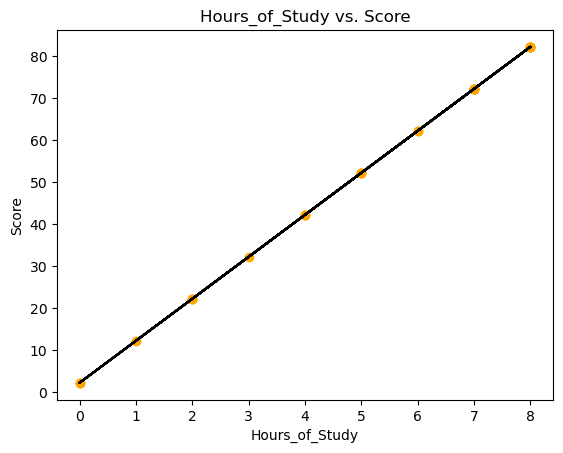

In [101]:
# scatter plot with Regression line for Hours_of_Study and Score
plt.scatter(X, y, color='orange')
plt.plot(X, y_pred, color='k')
plt.title('Hours_of_Study vs. Score')
plt.xlabel('Hours_of_Study')
plt.ylabel('Score')
plt.show()

In [102]:
# Calculate the residule
residule = y - y_pred                             

# Perform Shapiro-Wilk test
stat, p = stats.shapiro(residule)

# Print the results
print("Shapiro-Wilk Test:")
print("Test Statistic:", stat)
print("p-value:", p)

# Interpret the results
alpha = 0.05
if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

Shapiro-Wilk Test:
Test Statistic: 0.8952207407744851
p-value: 0.006429540774363637
Sample does not look Gaussian (reject H0)


In [103]:
# Assumptions
# Linearity: The scatter plot shows a linear trend, indicating a linear relationship
# Normality: Shapiro-Wilk test p-value helps check for normality in residuals, important for prediction accuracy

# Validating the model by splitting data and calculating MSE and R-squared on the test set

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on training set
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_test_pred = lin_reg.predict(X_test)

# Calculate Mean Squared Error and R-squared on test set
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print("Mean Squared Error on Test Set:", mse)
print("R-squared on Test Set:", r2)

Mean Squared Error on Test Set: 1.3001224065061858e-12
R-squared on Test Set: 0.9999999999999984


In [104]:
# Question 3, Linear Optimization

# import libraries
from scipy.optimize import linprog

In [105]:
# Define the coefficients of the objective function (negative for maximization)
c = [-1, -1, -1]  # maximize x + y + z

In [106]:
# Define the inequality matrix for the constraints
# Each row represents a constraint with coefficients of x, y, z
A = [
    [2, 1, 3],  # Machine X constraint
    [4, 3, 2]   # Machine Y constraint
]

In [107]:
# Define the RHS of each constraint (available hours of each machine)
b = [100, 85]

In [108]:
# Define bounds for each variable (x, y, z) - non-negativity constraints
x_bounds = (0, None)
y_bounds = (0, None)
z_bounds = (0, None)
bounds = [x_bounds, y_bounds, z_bounds]

In [109]:
# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

In [110]:
# Output the result
if result.success:
    print("Optimal production quantities:")
    print(f"Product A (x): {result.x[0]:.2f}")
    print(f"Product B (y): {result.x[1]:.2f}")
    print(f"Product C (z): {result.x[2]:.2f}")
    print(f"Maximum total production output: {-result.fun:.2f}")
else:
    print("No optimal solution found.")

Optimal production quantities:
Product A (x): 0.00
Product B (y): 7.86
Product C (z): 30.71
Maximum total production output: 38.57
